###        IRIS FLOWER CLASSIFICATION USING GAUSIAN MIXTURE MODE(GMM)

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings(action='ignore')

In [ ]:
iris=pd.read_csv("Iris.csv")
print(iris.shape)

(150, 6)


DATA PRE PROCESSING

In [ ]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(iris.isna().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [ ]:
print(iris.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


EXPLORATORY DATA ANALYSIS(EDA)

In [ ]:
n = len(iris[iris['Species'] == 'Iris-versicolor'])
print("No of Versicolor in Dataset:",n)
n1 = len(iris[iris['Species'] == 'Iris-virginica'])
print("No of Virginica in Dataset:",n1)
n2 = len(iris[iris['Species'] == 'Iris-setosa'])
print("No of Setosa in Dataset:",n2)

No of Versicolor in Dataset: 50
No of Virginica in Dataset: 50
No of Setosa in Dataset: 50


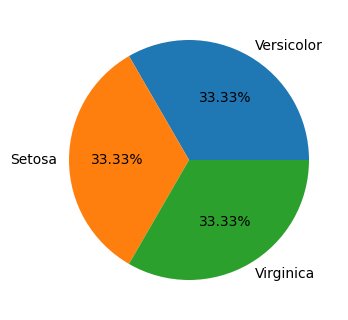

In [ ]:
fig = plt.figure(figsize=(3,3))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()


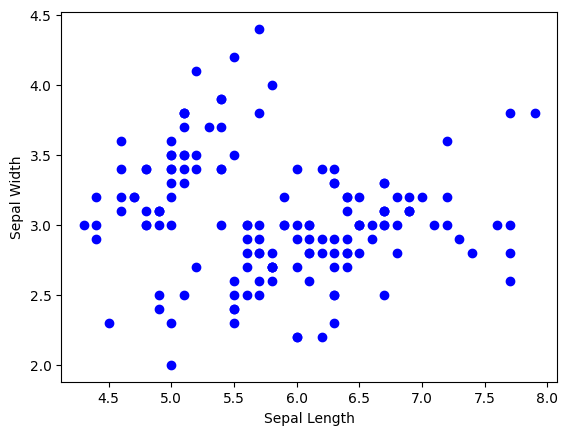

In [ ]:
X = iris['SepalLengthCm'].values.reshape(-1,1)
Y = iris['SepalWidthCm'].values.reshape(-1,1)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='b')
plt.show()

In [ ]:
corr_mat = iris.corr()
print(corr_mat)

                     Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  \
Id             1.000000       0.716676     -0.397729       0.882747   
SepalLengthCm  0.716676       1.000000     -0.109369       0.871754   
SepalWidthCm  -0.397729      -0.109369      1.000000      -0.420516   
PetalLengthCm  0.882747       0.871754     -0.420516       1.000000   
PetalWidthCm   0.899759       0.817954     -0.356544       0.962757   

               PetalWidthCm  
Id                 0.899759  
SepalLengthCm      0.817954  
SepalWidthCm      -0.356544  
PetalLengthCm      0.962757  
PetalWidthCm       1.000000  


GAUSSIAN MIXTURE MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [ ]:
train, test = train_test_split(iris, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [ ]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
train_y = train.Species

test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
test_y = test.Species

In [ ]:
train_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
144,6.7,3.3,5.7,2.5
21,5.1,3.7,1.5,0.4
112,6.8,3.0,5.5,2.1
99,5.7,2.8,4.1,1.3
42,4.4,3.2,1.3,0.2


In [ ]:
train_y.head()

144     Iris-virginica
21         Iris-setosa
112     Iris-virginica
99     Iris-versicolor
42         Iris-setosa
Name: Species, dtype: object

In [ ]:
test_X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
106,4.9,2.5,4.5,1.7
115,6.4,3.2,5.3,2.3
113,5.7,2.5,5.0,2.0
94,5.6,2.7,4.2,1.3
90,5.5,2.6,4.4,1.2


In [ ]:
test_y.head()

106     Iris-virginica
115     Iris-virginica
113     Iris-virginica
94     Iris-versicolor
90     Iris-versicolor
Name: Species, dtype: object

In [ ]:
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(train_X,train_y)
y_pred = model.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred))

Accuracy Score: 0.9473684210526315


ACCURACY OF THIS MODEL IS 94.7%

In [ ]:

new_data = np.array([[4.1, 3.0, 3.8, 6.0]])
new_labels = model.predict(new_data)

print("The Species Is", new_labels[0])



The Species Is Iris-virginica
